In [39]:
import copy

import numpy as np
import networkx as nx
import csv
import matplotlib.pyplot as plt
import copy
import pandas as pd

In [40]:
# Replace 'file.csv' with your file's path
df = pd.read_csv('restider.csv')

# Drop the first column by label and print the DataFrame to check
df = df.drop(df.columns[0], axis=1)

# Convert the DataFrame to a NumPy array
data = df.to_numpy()

In [43]:
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix != 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500)
    plt.show()

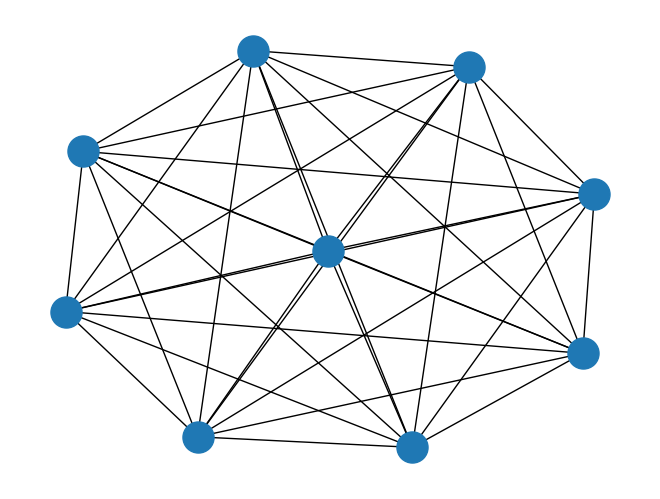

In [44]:
show_graph_with_labels(data,list(df.columns))